# Simple test of compressed sensing methods

In [1]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt

from nopt.transforms import *
from nopt.constraints import *
from nopt.problems import *
from nopt.solvers import *
from nopt.tests import *

import scipy

In [2]:
m = 500
n = 1000
Amat = np.random.normal(0,1, (m,n))
A = scipy.sparse.linalg.aslinearoperator(Amat)
k = 100
r = 20
HTs = Sparsity(k)
HTr = FixedRank(r)

In [3]:
x_true = np.random.normal(0,1, (n, 1)) / np.sqrt(n)
sub, x_true = HTs.project(x_true)
b = A.matvec(x_true)
problem = LinearProblem(A, b, HTs, x_true = x_true)

In [4]:
solver = NIHT(logverbosity = 2)
x, opt_log = solver.solve(problem)

 iter		   obj. value	    grad. norm	     xdist
    1	+2.3465256759401821e+07	5.53076518e+05
    2	+1.2500774478690611e+07	3.16274130e+05
    3	+7.4536892157307826e+06	2.33182055e+05
    4	+4.5127622293722713e+06	1.84056847e+05
    5	+3.0740119334957073e+06	1.43022535e+05
    6	+1.8685487761004006e+06	1.18862148e+05
    7	+1.3466850103036298e+06	9.26238976e+04
    8	+7.8957465625610854e+05	7.87422002e+04
    9	+5.7354560556962376e+05	6.02143362e+04
   10	+3.3046277772567450e+05	5.14489187e+04
   11	+2.4453089852133498e+05	3.89407686e+04
   12	+1.3998015521074762e+05	3.36266497e+04
   13	+1.0440699198771855e+05	2.53453374e+04
   14	+5.9964296659540509e+04	2.19700091e+04
   15	+4.4317132064211211e+04	1.65928490e+04
   16	+2.5458005567467088e+04	1.43341985e+04
   17	+1.9048529280769893e+04	1.07948676e+04
   18	+1.0856594959271753e+04	9.41109146e+03
   19	+8.2469794363997935e+03	7.03687461e+03
   20	+4.6315965042195003e+03	6.19378813e+03
   21	+3.6848483059221567e+03	4.58755746e+03
   22	+2

In [5]:
np.linalg.norm(x - x_true, 2)/ np.linalg.norm(x_true, 2)

1.5075083274398355e-05

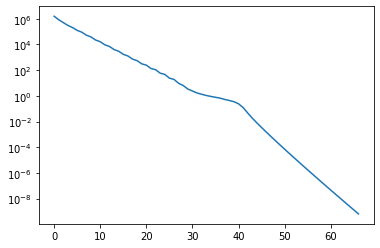

In [6]:
plt.semilogy(opt_log['iterations']['fx'] / np.linalg.norm(b))